# Pandas学习笔记

## pandas常见数据类型
1. Series 一维，带标签数组
2. DataFrame 二维，Series容器

## 创建series

In [29]:
import pandas as pd
import numpy as np

In [2]:
# 1.通过列表创建
t = pd.Series([1,23,3,3,1], index = list("abcde"))
t

a     1
b    23
c     3
d     3
e     1
dtype: int64

In [4]:
t.dtype

dtype('int64')

In [3]:
# 2.通过字典创建（字典键变成索引）
temp_dict = {"name":"sy","age":17, "tel":11111}
t1 = pd.Series(temp_dict)
t1

name       sy
age        17
tel     11111
dtype: object

In [6]:
t1.dtype

dtype('O')

## 修改数据类型

In [10]:
t.astype(float)

a     1.0
b    23.0
c     3.0
d     3.0
e     1.0
dtype: float64

## series切片与索引

In [11]:
t1['name']

'sy'

In [12]:
t1[0]

'sy'

In [16]:
# 取连续多行
t1[1:]

age       17
tel    11111
dtype: object

In [13]:
# 取不连续多行
t1[[0,2]]

name       sy
tel     11111
dtype: object

In [18]:
t[1:2:5]

b    23
dtype: int64

In [15]:
# 布尔索引
t[t>3]

b    23
dtype: int64

## series的索引和值

In [19]:
t1.index

Index(['name', 'age', 'tel'], dtype='object')

In [21]:
# 索引可遍历
for i in t1.index:
    print(i)

name
age
tel


In [22]:
type(t1.index)

pandas.core.indexes.base.Index

In [23]:
len(t1.index)

3

In [24]:
list(t1.index)

['name', 'age', 'tel']

In [25]:
t1.values

array(['sy', 17, 11111], dtype=object)

In [26]:
type(t1.values)

numpy.ndarray

> ndarray很多方法可以应用于series

## 读取外部数据

- pd.read_csv()
- pd.read_excel()
- pd.read_sql()
- .....

## Dataframe

DataFrame对象既有行索引，又有列索引
- 行索引，表明不同行，横向索引，叫index，0轴，axis=0
- 列索引，表名不同列，纵向索引，叫columns，1轴，axis=1

In [32]:
# 通过ndarray创建
df = pd.DataFrame(np.arange(12).reshape((3,4)),index = list("abc"), columns = list("WXYZ"))
df

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [37]:
# 通过字典创建
d1 = {"name":["xiaoming","yilin","ruoxi"],"age":[23,16,17],"tel":[10086,10020,11]}
df1 = pd.DataFrame(d1)
df1

,name,age,tel
0,xiaoming,23,10086
1,yilin,16,10020
2,ruoxi,17,11


In [80]:
# 通过列表创建
d2 = [{"name":"xiaoming","age":23,"tel":10086},{"name":"yilin","age":30}]
df2 = pd.DataFrame(d2)
df2

,age,name,tel
0,23,xiaoming,10086.0
1,30,yilin,NaN


## Dataframe的基本操作

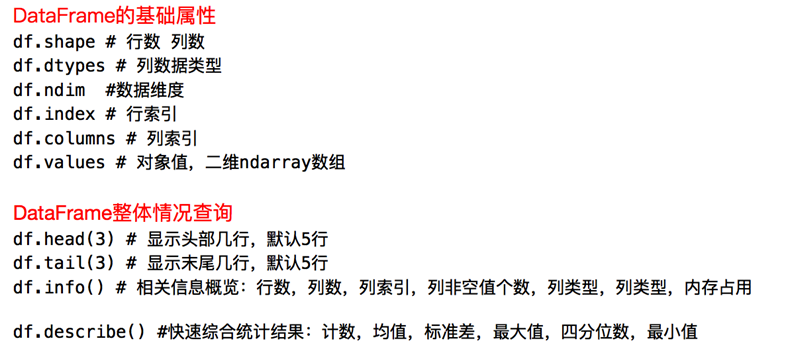

In [38]:
df1.index

RangeIndex(start=0, stop=3, step=1)

In [39]:
df1.columns

Index(['name', 'age', 'tel'], dtype='object')

In [41]:
df1.values

array([['xiaoming', 23, 10086],
       ['yilin', 16, 10020],
       ['ruoxi', 17, 11]], dtype=object)

In [42]:
df1.shape

(3, 3)

In [43]:
df1.dtypes

name    object
age      int64
tel      int64
dtype: object

In [45]:
df1.ndim

2

In [44]:
df.head() #默认前五行

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [46]:
df.tail() #默认后五行

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
W    3 non-null int32
X    3 non-null int32
Y    3 non-null int32
Z    3 non-null int32
dtypes: int32(4)
memory usage: 72.0+ bytes


In [50]:
df.describe() #输出描述统计的信息

,W,X,Y,Z
count,3.0,3.0,3.0,3.0
mean,4.0,5.0,6.0,7.0
std,4.0,4.0,4.0,4.0
min,0.0,1.0,2.0,3.0
25%,2.0,3.0,4.0,5.0
50%,4.0,5.0,6.0,7.0
75%,6.0,7.0,8.0,9.0
max,8.0,9.0,10.0,11.0


### 实操

In [51]:
import pandas as pd
import numpy as np

In [52]:
df3 = pd.read_csv("./file/dogNames2.csv")
df3.head()

,Row_Labels,Count_AnimalName
0,1,1
1,2,2
2,40804,1
3,90201,1
4,90203,1


In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16220 entries, 0 to 16219
Data columns (total 2 columns):
Row_Labels          16217 non-null object
Count_AnimalName    16220 non-null int64
dtypes: int64(1), object(1)
memory usage: 253.5+ KB


#### 排序

In [55]:
df3.sort_values(by = "Count_AnimalName", ascending=False).head()

,Row_Labels,Count_AnimalName
1156,BELLA,1195
9140,MAX,1153
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


## Dataframe索引和切片

### 取行取列

pandas取行取列的注意事项
- 方括号写数组，表示取行，对行进行操作
- 方括号写字符串，表示取列，对列进行操作

In [57]:
df4 = df3.sort_values(by = "Count_AnimalName", ascending=False)
df4[:5]

,Row_Labels,Count_AnimalName
1156,BELLA,1195
9140,MAX,1153
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


In [58]:
df4["Row_Labels"]

1156              BELLA
9140                MAX
2660            CHARLIE
3251               COCO
12368             ROCKY
8417               LOLA
8552              LUCKY
8560               LUCY
2032              BUDDY
3641              DAISY
11703          PRINCESS
829              BAILEY
9766              MOLLY
14466             TEDDY
2913              CHLOE
14779              TOBY
8620               LUNA
6515               JACK
8788             MAGGIE
13762            SOPHIE
10750              OREO
8296               LILY
10696            OLIVER
9552               MILO
5531              GIZMO
7945               LADY
5468             GINGER
9425                MIA
11155             PENNY
12548              RUBY
              ...      
6927               JOIA
6932               JOKO
6933              JOLEE
6934             JOLENA
6938              JOLIN
6940               JOLT
6898            JOCELYN
6896     JOBIE-EINSTEIN
6862              JINJU
6892                JOB
6863            

### loc和iloc

- df.loc 通过标签索引行数据
- df.iloc 通过位置获取行数据

### loc

In [59]:
df5 = pd.DataFrame(np.arange(12).reshape((3,4)), index = list("abc"), columns = list("WXYZ"))
df5

,W,X,Y,Z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [60]:
# 取某行某列上的值
df5.loc["a","Z"]

3

In [61]:
# 取行
df5.loc["a"]

W    0
X    1
Y    2
Z    3
Name: a, dtype: int32

In [63]:
# 取列
df5.loc[:,"Y"]

a     2
b     6
c    10
Name: Y, dtype: int32

In [64]:
# 取不连续的行
df5.loc[["a","c"]]

,W,X,Y,Z
a,0,1,2,3
c,8,9,10,11


In [65]:
# 取不连续的列
df5.loc[:,["W","Y"]]

,W,Y
a,0,2
b,4,6
c,8,10


In [66]:
# 取不连续的行和列
df5.loc[["a","c"],["W","Y"]]

,W,Y
a,0,2
c,8,10


In [67]:
df5.loc["a":"c",["W","Y"]] #冒号在loc里面是左闭右闭的

,W,Y
a,0,2
b,4,6
c,8,10


### iloc

In [68]:
df5.iloc[1]

W    4
X    5
Y    6
Z    7
Name: b, dtype: int32

In [69]:
df5.iloc[:,[2,1]]

,Y,X
a,2,1
b,6,5
c,10,9


In [70]:
df5.iloc[[0,1],[1,2]]

,X,Y
a,1,2
b,5,6


In [71]:
df5.iloc[0:2,[1,2]] # iloc的冒号依然是左闭右开的

,X,Y
a,1,2
b,5,6


In [72]:
df5.iloc[1] = np.nan
df5

,W,X,Y,Z
a,0.0,1.0,2.0,3.0
b,NaN,NaN,NaN,NaN
c,8.0,9.0,10.0,11.0


### bool索引

In [76]:
# 多重条件筛选： & |
# 不同条件需要用括号括起来
df4[(df4["Count_AnimalName"]>800)&(df4["Count_AnimalName"]<1000)]

,Row_Labels,Count_AnimalName
2660,CHARLIE,856
3251,COCO,852
12368,ROCKY,823


> tips pandas字符串方法

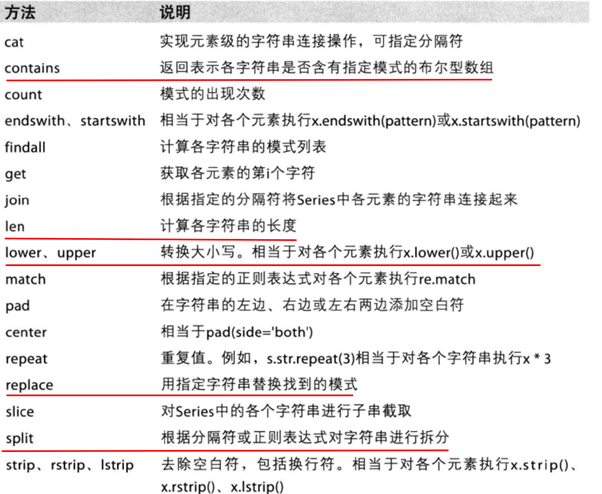

In [78]:
df4[(df4["Count_AnimalName"]>700)&(df4["Row_Labels"].str.len()>4)]

,Row_Labels,Count_AnimalName
1156,BELLA,1195
2660,CHARLIE,856
12368,ROCKY,823
8552,LUCKY,723


## 缺失值处理

我们的数据缺失通常有两种情况：
- 一种就是空，None等，在pandas是NaN(和np.nan一样)
- 另一种是我们让其为0

> nan不会参与计算，但是0会参与计算，所以在实际情况下最好记录nan

In [81]:
# 判断df里时候有nan
pd.isnull(df2)

,age,name,tel
0,False,False,False
1,False,False,True


In [82]:
pd.notnull(df2)

,age,name,tel
0,True,True,True
1,True,True,False


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
age     2 non-null int64
name    2 non-null object
tel     1 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.0+ bytes


### 删除nan的行

In [84]:
df2.dropna(axis = 0) # 删除有nan的行

,age,name,tel
0,23,xiaoming,10086.0


In [86]:
df2.dropna(axis = 0, how="any")

,age,name,tel
0,23,xiaoming,10086.0


In [85]:
df2.dropna(axis=0, how="all") # 某行全是Nan时删除

,age,name,tel
0,23,xiaoming,10086.0
1,30,yilin,NaN


In [87]:
df2 # 并不改变df2本身

,age,name,tel
0,23,xiaoming,10086.0
1,30,yilin,NaN


In [88]:
df2.dropna(axis=0, how="any", inplace=True) # 对df2本身进行改变
df2

,age,name,tel
0,23,xiaoming,10086.0


### 填充nan

In [94]:
# 通过列表创建
d2 = [{"name":"xiaoming","age":23,"tel":10086},{"name":"yilin","tel":10080},{"name":"xiao","age":29}]
df2 = pd.DataFrame(d2)
df2

,age,name,tel
0,23.0,xiaoming,10086.0
1,NaN,yilin,10080.0
2,29.0,xiao,NaN


In [102]:
df2.fillna(df2.mean()) # 不改变df2本身

,age,name,tel
0,23.0,xiaoming,10086.0
1,26.0,yilin,10080.0
2,29.0,xiao,10083.0


In [103]:
df2

,age,name,tel
0,23.0,xiaoming,10086.0
1,NaN,yilin,10080.0
2,29.0,xiao,NaN


### 处理零值

在判断0值是异常值之后，可以将0值转化为nan,然后继续处理

df[df == 0] = np,nan

In [ ]:
data.query("condition")